# Includes

In [0]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Basic Autograd 

In [3]:
# Example 1 (Linear 1D) 
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

y = w*x + b

# Backprop
y.backward()

# Print out the gradients.
print(x.grad)    
print(w.grad)    
print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


In [9]:
# Example 2 (Linear Regression)
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)
print(x.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.3400, -0.4674,  0.4258],
        [-0.1894,  0.1355,  0.5381]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.4912, -0.1716], requires_grad=True)
loss:  2.7776167392730713
dL/dw:  tensor([[ 0.1939, -0.8835,  2.2192],
        [ 0.1195, -0.0944,  1.6635]])
dL/db:  tensor([-0.0812,  0.0424])
None
loss after 1 step optimization:  2.6930313110351562


# Misc

In [19]:
x = np.array([[1,2],[3,4]])

# Convert np array to tensor
y = torch.from_numpy(x)

# tensor to np array
z = y.numpy()


##### SETTING UP A PIPELINE FOR STANDARD DATASETS ######
# Download and construct CIFAR-10 dataset.
# The transforms.ToTenssor() option converts PIL images or np arrays in range 0 to 255 (HxWxC) to normalized [0,1] (CxHxW) 
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
# every call to next() gives us 64 pairs
images, labels = data_iter.next()
print(labels.shape) # Will print 64

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

########### Pipeline for a custom dataset ############
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)

############### Loading a Pretrained model ###############
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)

print(resnet.fc.out_features)

####### Saving and Loading a model ##########
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

Files already downloaded and verified
torch.Size([3, 32, 32])
6
torch.Size([64])


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth

  0%|          | 0.00/44.7M [00:00<?, ?B/s]
 23%|██▎       | 10.1M/44.7M [00:00<00:00, 106MB/s]
 45%|████▍     | 19.9M/44.7M [00:00<00:00, 105MB/s]
 67%|██████▋   | 29.9M/44.7M [00:00<00:00, 105MB/s]
 90%|████████▉ | 40.0M/44.7M [00:00<00:00, 105MB/s]
100%|██████████| 44.7M/44.7M [00:00<00:00, 103MB/s]

torch.Size([64, 100])
100


# Linear Regression

Epoch [5/60], Loss: 0.5435
Epoch [10/60], Loss: 0.4876
Epoch [15/60], Loss: 0.4645
Epoch [20/60], Loss: 0.4547
Epoch [25/60], Loss: 0.4503
Epoch [30/60], Loss: 0.4481
Epoch [35/60], Loss: 0.4468
Epoch [40/60], Loss: 0.4459
Epoch [45/60], Loss: 0.4451
Epoch [50/60], Loss: 0.4443
Epoch [55/60], Loss: 0.4436
Epoch [60/60], Loss: 0.4429


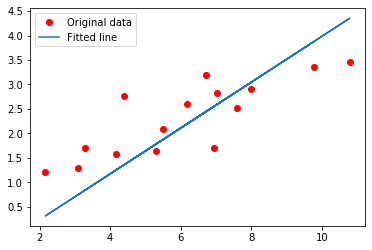

In [24]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model (1x1 linear layer)
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    # Zero gradients from previous iterations
    optimizer.zero_grad()
    # Backprop
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
#Final predictions after training
predicted = model(torch.from_numpy(x_train)).detach().numpy()
# True graph
plt.plot(x_train, y_train, 'ro', label='Original data')
# Predicted graph
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## Doing the same thing as above but using the Data Loader

Epoch [5/60], Loss: 2.0839
Epoch [5/60], Loss: 1.9971
Epoch [5/60], Loss: 1.4121
Epoch [10/60], Loss: 0.1599
Epoch [10/60], Loss: 0.7120
Epoch [10/60], Loss: 0.0704
Epoch [15/60], Loss: 0.0272
Epoch [15/60], Loss: 0.4703
Epoch [15/60], Loss: 0.0801
Epoch [20/60], Loss: 0.0605
Epoch [20/60], Loss: 0.1237
Epoch [20/60], Loss: 0.3729
Epoch [25/60], Loss: 0.3257
Epoch [25/60], Loss: 0.0673
Epoch [25/60], Loss: 0.1789
Epoch [30/60], Loss: 0.0309
Epoch [30/60], Loss: 0.3922
Epoch [30/60], Loss: 0.1386
Epoch [35/60], Loss: 0.3064
Epoch [35/60], Loss: 0.0649
Epoch [35/60], Loss: 0.1919
Epoch [40/60], Loss: 0.2527
Epoch [40/60], Loss: 0.0501
Epoch [40/60], Loss: 0.2524
Epoch [45/60], Loss: 0.3756
Epoch [45/60], Loss: 0.0081
Epoch [45/60], Loss: 0.1697
Epoch [50/60], Loss: 0.0234
Epoch [50/60], Loss: 0.3210
Epoch [50/60], Loss: 0.2258
Epoch [55/60], Loss: 0.3341
Epoch [55/60], Loss: 0.2239
Epoch [55/60], Loss: 0.0048
Epoch [60/60], Loss: 0.2697
Epoch [60/60], Loss: 0.2531
Epoch [60/60], Loss: 0.

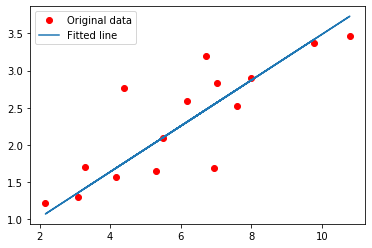

In [35]:
class ToyDataset(torch.utils.data.Dataset):
    def __init__(self):
        # Load Data 
        self.x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

        self.y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

    def __getitem__(self, index):
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        return (self.x_train[index], self.y_train[index])

    def __len__(self):
        return x_train.shape[0]

# You can then use the prebuilt data loader. 
ds = ToyDataset()
train_loader = torch.utils.data.DataLoader(dataset=ds,
                                           batch_size=5, 
                                           shuffle=True)
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Linear regression model (1x1 linear layer)
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    for x, y in train_loader:
        
        # Convert numpy arrays to torch tensors (No need to convert here since dataloader returns tensors)
        inputs = x
        targets = y

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
    
        # Backward and optimize
        # Zero gradients from previous iterations
        optimizer.zero_grad()
        # Backprop
        loss.backward()
        optimizer.step()
    
        if (epoch+1) % 5 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
#Final predictions after training

# Nice way to get entire daatset from a dataLoader
x_train = ds[:][0]
y_train = ds[:][1]

predicted = model(torch.from_numpy(x_train)).detach().numpy()
# True graph
plt.plot(x_train, y_train, 'ro', label='Original data')
# Predicted graph
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

# Logistic Regression

In [37]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        # From (batch_size, 1, 28, 28) to (batch_size, 1, 28*28)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2022
Epoch [1/5], Step [200/600], Loss: 2.0750
Epoch [1/5], Step [300/600], Loss: 2.0048
Epoch [1/5], Step [400/600], Loss: 1.9185
Epoch [1/5], Step [500/600], Loss: 1.8528
Epoch [1/5], Step [600/600], Loss: 1.8422
Epoch [2/5], Step [100/600], Loss: 1.7191
Epoch [2/5], Step [200/600], Loss: 1.6464
Epoch [2/5], Step [300/600], Loss: 1.6298
Epoch [2/5], Step [400/600], Loss: 1.4922
Epoch [2/5], Step [500/600], Loss: 1.5216
Epoch [2/5], Step [600/600], Loss: 1.4065
Epoch [3/5], Step [100/600], Loss: 1.4516
Epoch [3/5], Step [200/600], Loss: 1.3581
Epoch [3/5], Step [300/600], Loss: 1.3408
Epoch [3/5], Step [400/600], Loss: 1.2430
Epoch [3/5], Step [500/600], Loss: 1.2801
Epoch [3/5], Step [600/600], Loss: 1.2528
Epoch [4/5], Step [100/600], Loss: 1.2563
Epoch [4/5], Step [200/600], Loss: 1.2555
Epoch [4/5], Step [300/600], Loss: 1.2521
Epoch [4/5], Step [400/600], Loss: 1.1429
Epoch [4/5], Step [500/600], Loss: 1.1269
Epoch [4/5], Step [600/600], Loss:

In [48]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        
        # Why is .data required? Removing it seems to make no difference
        # .max() returns the max element along axis = 1
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the model on the 10000 test images: 82 %


# Feed Forward Neural Network